## Intoduce

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).




## Attribute Information:

Input variables:
- bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
- related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.drop('duration', axis=1, inplace=True)

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [6]:
print('Total rows   :', df.shape[0])
print('Total columns:', df.shape[1])

Total rows   : 45211
Total columns: 16


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [8]:
display(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
print('Total duplicated rows:', sum(df.duplicated()))

Total duplicated rows: 16


In [10]:
display(df[df.duplicated(keep=False)])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
2807,44,services,single,secondary,no,0,yes,no,unknown,14,may,1,-1,0,unknown,no
2871,44,services,single,secondary,no,0,yes,no,unknown,14,may,1,-1,0,unknown,no
4878,34,management,single,tertiary,no,0,yes,no,unknown,21,may,1,-1,0,unknown,no
4910,34,management,single,tertiary,no,0,yes,no,unknown,21,may,1,-1,0,unknown,no
12754,25,blue-collar,married,primary,no,0,no,no,cellular,7,jul,1,-1,0,unknown,no
12939,25,blue-collar,married,primary,no,0,no,no,cellular,7,jul,1,-1,0,unknown,no
13576,47,services,married,secondary,no,0,yes,no,cellular,9,jul,1,-1,0,unknown,no
13662,47,services,married,secondary,no,0,yes,no,cellular,9,jul,1,-1,0,unknown,no
15760,35,management,married,tertiary,no,0,yes,no,cellular,21,jul,3,-1,0,unknown,no
15836,35,management,married,tertiary,no,0,yes,no,cellular,21,jul,3,-1,0,unknown,no


In [11]:
df.drop_duplicates(inplace=True)
print('Total duplicated rows now:', sum(df.duplicated()))
print('Total rows now:', df.shape[0])

Total duplicated rows now: 0
Total rows now: 45195


In [12]:
cols_ctg = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in cols_ctg:
    df[col] = df[col].astype('category')

In [13]:
df.rename(columns={'y': 'deposit'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45195 non-null  int64   
 1   job        45195 non-null  category
 2   marital    45195 non-null  category
 3   education  45195 non-null  category
 4   default    45195 non-null  category
 5   balance    45195 non-null  int64   
 6   housing    45195 non-null  category
 7   loan       45195 non-null  category
 8   contact    45195 non-null  category
 9   day        45195 non-null  int64   
 10  month      45195 non-null  category
 11  campaign   45195 non-null  int64   
 12  pdays      45195 non-null  int64   
 13  previous   45195 non-null  int64   
 14  poutcome   45195 non-null  category
 15  deposit    45195 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.8 MB


## Exploratory Data Analysis

In [15]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,45195.0,40.937604,10.619108,18.0,33.0,39.0,48.0,95.0
balance,45195.0,1362.754331,3045.196838,-8019.0,72.0,449.0,1428.0,102127.0
day,45195.0,15.804824,8.322816,1.0,8.0,16.0,21.0,31.0
campaign,45195.0,2.763978,3.098304,1.0,1.0,2.0,3.0,63.0
pdays,45195.0,40.212413,100.143468,-1.0,-1.0,-1.0,-1.0,871.0
previous,45195.0,0.580529,2.303823,0.0,0.0,0.0,0.0,275.0


In [16]:
cols_num = df.select_dtypes(include='number').columns.tolist()
print(cols_num)

['age', 'balance', 'day', 'campaign', 'pdays', 'previous']


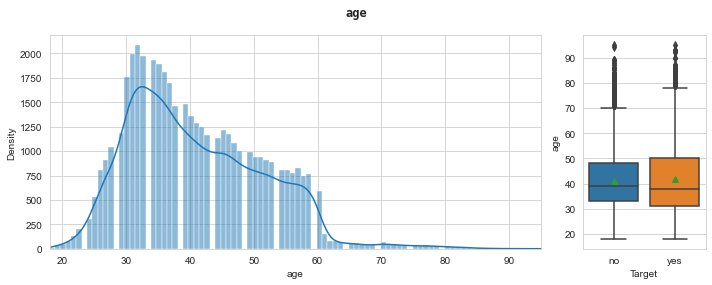

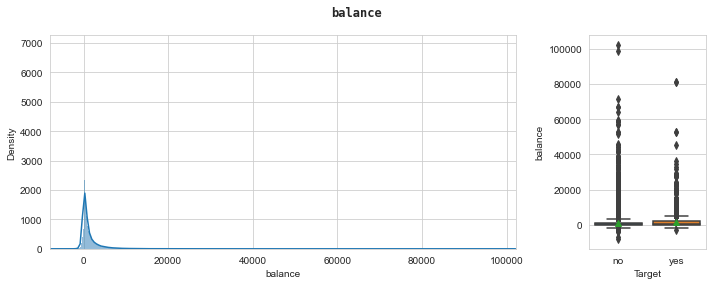

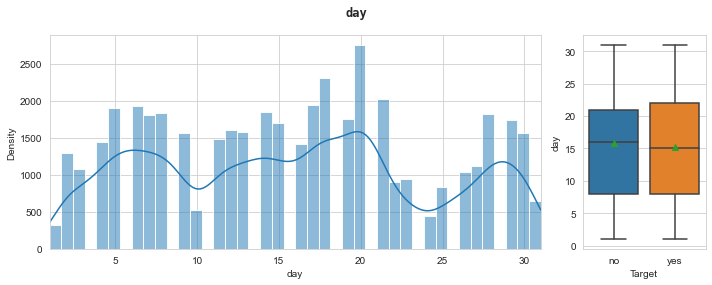

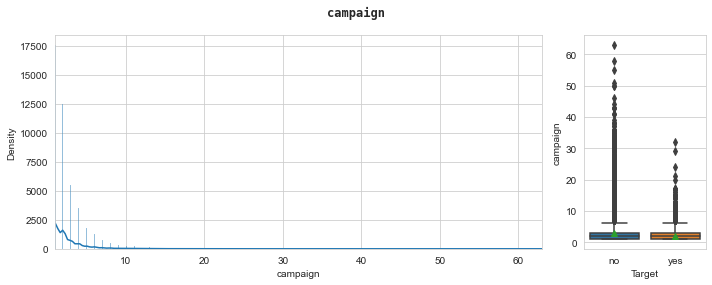

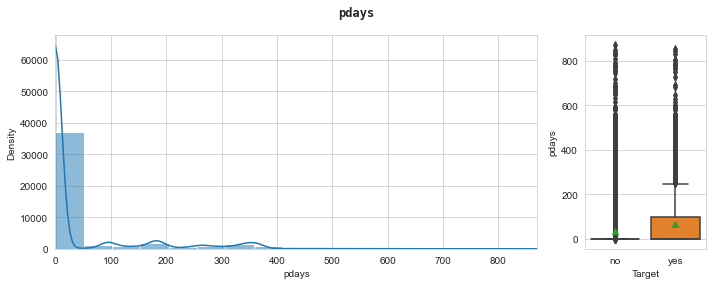

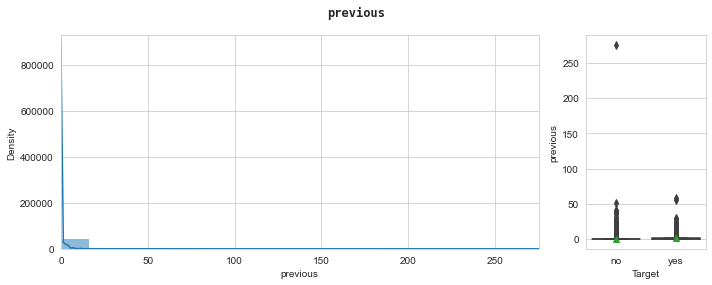

In [17]:
for col in cols_num:
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(10, 4), tight_layout=True)
    fig.suptitle(col, fontsize='large', fontweight='bold', family='monospace')

    sns.histplot(df[col], ax=ax[0], kde=True)
    ax[0].set_ylabel('Density')
    ax[0].margins(x=0)

    sns.boxplot(ax=ax[1], x='deposit', y=col, data=df, showmeans=True)
    ax[1].set_xlabel('Target')

    plt.show()

In [18]:
cols_ctg = df.select_dtypes(include='category').columns.tolist()
print(cols_ctg)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


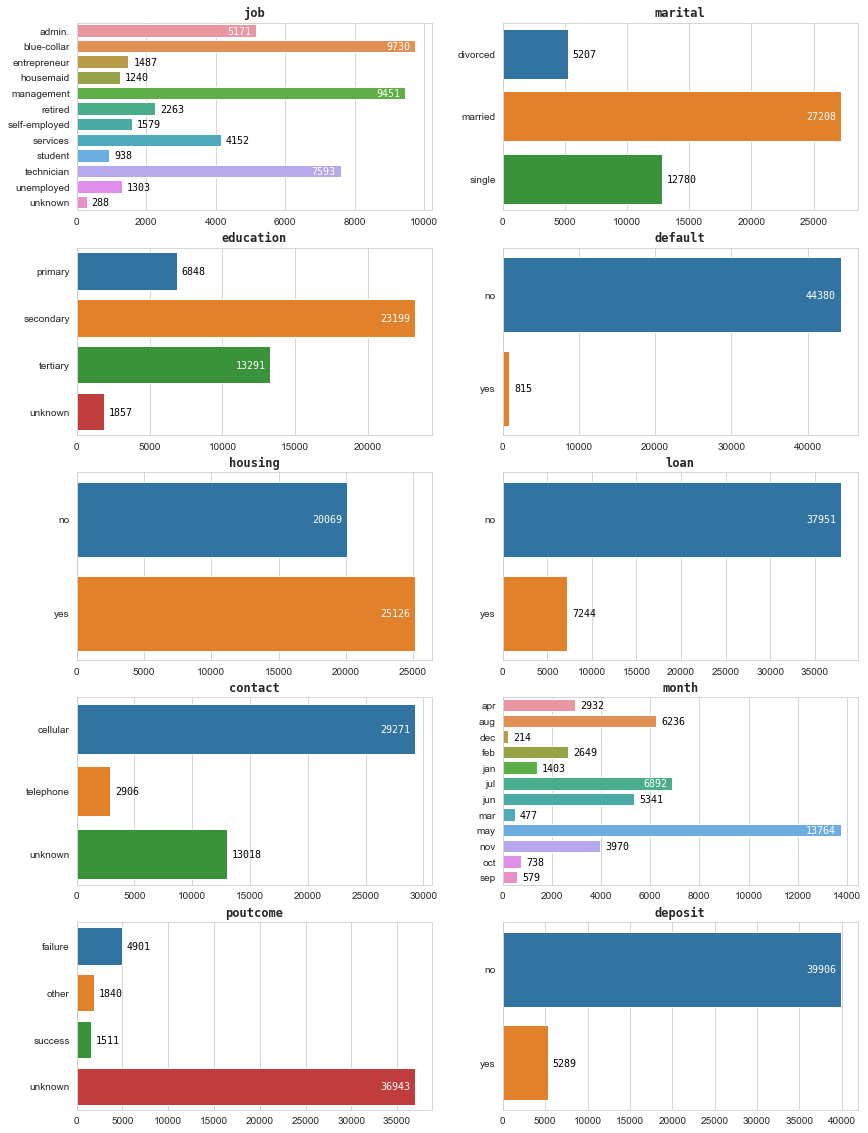

In [19]:
plot_cols = 2
plot_rows = int(-1 * (-1 * len(cols_ctg) // plot_cols))

fig = plt.figure(figsize=(7*plot_cols, 4*plot_rows))

for n_plot, c in enumerate(cols_ctg):
    ax = plt.subplot(plot_rows, plot_cols, n_plot+1)
    sns.countplot(y=c, data=df)
    plt.title(c, fontsize='large', fontweight='bold', family='monospace')
    plt.xlabel('')
    plt.ylabel('')
    
    col_half = df[c].value_counts().max() / 2
    for i, p in enumerate(ax.patches):
        if p.get_width() < col_half:
            x_text, align, color = 5, 'left', 'black'
        else:
            x_text, align, color = -5, 'right', 'white'
        ax.annotate(str(p.get_width()), xy=(p.get_width(), p.get_y() + p.get_height() / 2), 
                    textcoords="offset points", xytext=(x_text, -3.5), ha=align, 
                    color=color, family='monospace')

## Data Prepocessing

In [20]:
df_prep = df.copy()
shape_init = df_prep.shape

#IQR = Q3 - Q1
#UL = Q3 + 1.5 * IQR
def uiqr(f):
    return df_prep[f].quantile(q=0.75) + 1.5 * (df_prep[f].quantile(q=0.75) - df_prep[f].quantile(q=0.25))
    
def info_out(feature):
    count = df_prep[df_prep[feature] > uiqr(feature)][feature].count()
    print(feature.capitalize(), 'above', uiqr(feature), 'are outliers')
    print('Outliers: ' + str(count) + ' from ' + str(len(df_prep)) + ' rows (' 
          + str(round(count*100/len(df_prep), 2)) + '%)')

def rem_out(feature):
    global df_prep
    info_out(feature)
    df_prep = df_prep[df_prep[feature] <= uiqr(feature)]
    print('Outliers removed.')
    print('-' * 40)

print('Initial data frame shape:', shape_init)
print('-' * 40)

cols_out = ['age', 'campaign']
for col in cols_out:
    rem_out(col)

shape_now = df_prep.shape
row_diff = shape_init[0]-shape_now[0]
print('Current data frame shape:', shape_now)
print('Removed total ' + str(row_diff) + ' rows (' + str(round(row_diff*100/shape_init[0], 2)) + '%)')

Initial data frame shape: (45195, 16)
----------------------------------------
Age above 70.5 are outliers
Outliers: 487 from 45195 rows (1.08%)
Outliers removed.
----------------------------------------
Campaign above 6.0 are outliers
Outliers: 3049 from 44708 rows (6.82%)
Outliers removed.
----------------------------------------
Current data frame shape: (41659, 16)
Removed total 3536 rows (7.82%)


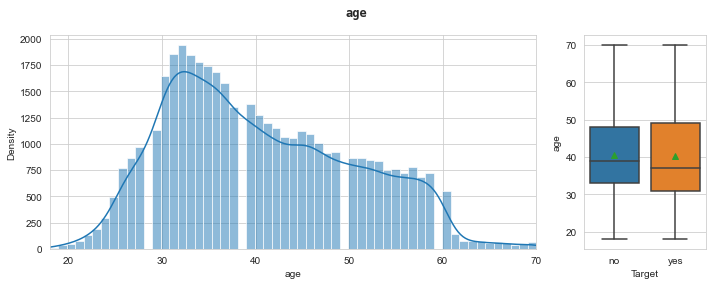

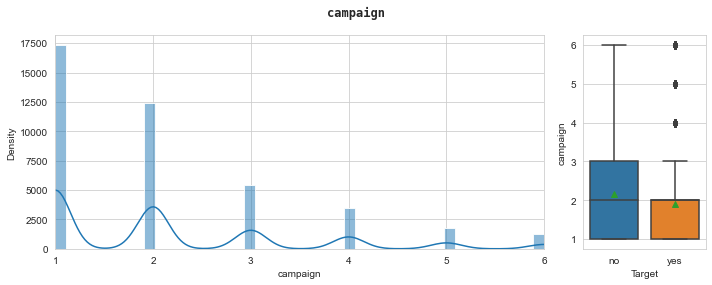

In [21]:
for col in cols_out:
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(10, 4), tight_layout=True)
    fig.suptitle(col, fontsize='large', fontweight='bold', family='monospace')

    sns.histplot(df_prep[col], ax=ax[0], kde=True)
    ax[0].set_ylabel('Density')
    ax[0].margins(x=0)

    sns.boxplot(ax=ax[1], x='deposit', y=col, data=df_prep, showmeans=True)
    ax[1].set_xlabel('Target')

    plt.show()

In [22]:
df_prep['deposit'] = df_prep['deposit'].replace({'yes': 1, 'no': 0})
cols_ctg.remove('deposit')

In [23]:
LE = LabelEncoder()
for c in cols_ctg:
    df_prep[c] = LE.fit_transform(df_prep[c])

with pd.option_context('max_columns', None):
    display(df_prep.sample(n=10, random_state=1))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
37154,30,1,1,0,0,2,1,1,0,13,8,6,-1,0,3,0
34309,32,4,1,2,0,141,1,0,0,4,8,3,89,9,2,0
38304,29,4,2,2,0,499,1,0,0,15,8,1,-1,0,3,0
1868,27,9,2,1,0,527,1,0,2,9,8,1,-1,0,3,0
3732,40,9,1,1,0,257,1,0,2,16,8,4,-1,0,3,0
16914,44,9,2,0,0,237,1,0,0,25,5,1,-1,0,3,0
16137,28,9,2,2,0,968,0,1,0,22,5,2,-1,0,3,0
36216,29,9,2,2,0,452,1,0,0,11,8,1,-1,0,3,0
8384,38,4,1,2,1,-562,1,0,2,3,6,1,-1,0,3,0
3420,47,1,1,1,0,3237,1,0,2,15,8,3,-1,0,3,0


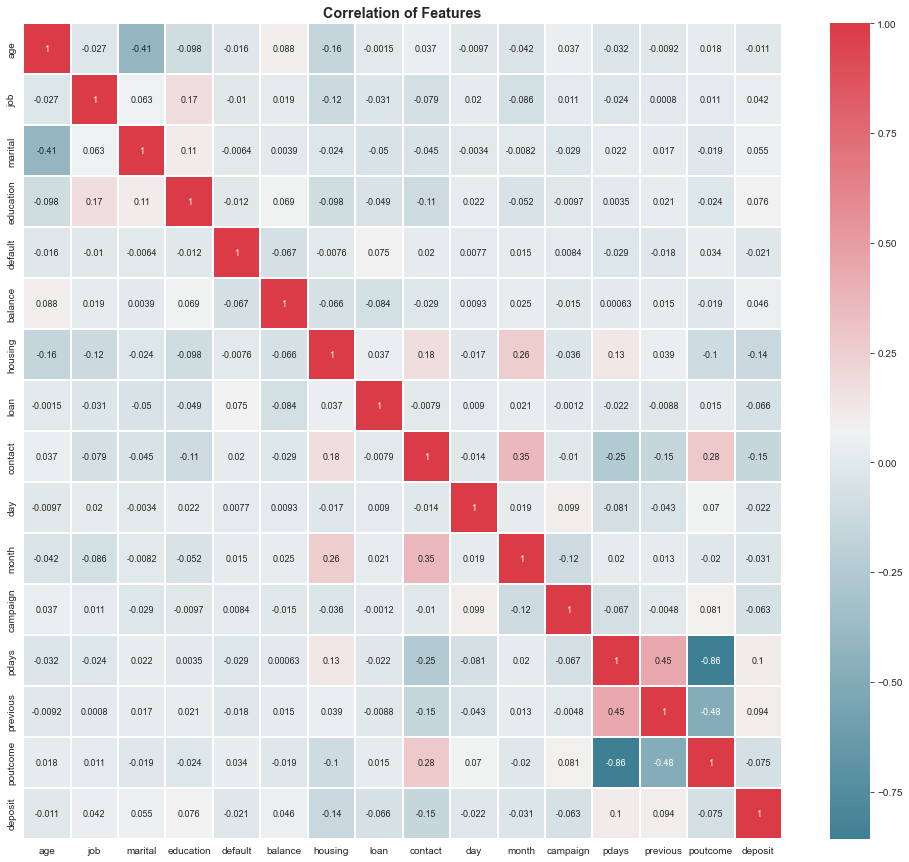

In [24]:
plt.figure(figsize=(17, 15))
plt.title('Correlation of Features', fontsize='x-large', fontweight='bold')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_prep.corr(), annot=True, cmap=cmap, linewidths=.1, annot_kws={'size': 9})
plt.show()

In [25]:
x = df_prep.drop('deposit', 1)
y = df_prep.deposit
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

print('Data frame size:', df_prep.shape)
print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

Data frame size: (41659, 16)
Training set size: (29161, 15)
Test set size: (12498, 15)


C:\Users\Nurianti\AppData\Local\Temp/ipykernel_17556/3595413130.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df_prep.drop('deposit', 1)


In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

display(x_test_scaled)

array([[-0.74673349, -1.31286823, -0.28694957, ...,  0.62440788,
         0.17157694, -0.53968018],
       [-1.14647273, -1.31286823,  1.35185505, ..., -0.36064929,
         0.58199079, -1.53327914],
       [-1.44627716, -1.00912866,  1.35185505, ..., -0.41975272,
        -0.2388369 ,  0.45391877],
       ...,
       [-0.34699425, -0.09790995, -0.28694957, ..., -0.41975272,
        -0.2388369 ,  0.45391877],
       [-0.8466683 , -0.09790995,  1.35185505, ..., -0.41975272,
        -0.2388369 ,  0.45391877],
       [-1.24640754,  1.42078791,  1.35185505, ..., -0.41975272,
        -0.2388369 ,  0.45391877]])

## Data Modelling

In [27]:
model_LR = LogisticRegression(solver='liblinear', random_state=11)
model_LR.fit(x_train_scaled, y_train)
y_pred_LR = model_LR.predict(x_test_scaled)

print(classification_report(y_test, y_pred_LR), end='')

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11003
           1       0.53      0.01      0.02      1495

    accuracy                           0.88     12498
   macro avg       0.71      0.51      0.48     12498
weighted avg       0.84      0.88      0.83     12498


In [28]:
result_lr = round(model_LR.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_LR.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_lr) + '%')

Training accuracy: 88.214%
Test accuracy:     88.054%


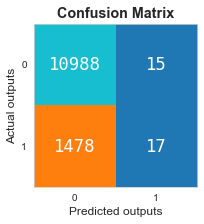

In [29]:
def cmplot(cm):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(cm, cmap='tab10')
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize='large')
    ax.set_ylabel('Actual outputs', fontsize='large')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white', 
                    fontsize='xx-large', fontfamily='monospace')
    plt.title('Confusion Matrix', fontsize='x-large', fontweight='bold')
    plt.show()

cmplot(confusion_matrix(y_test, y_pred_LR))

## K-Nearest Neighbors (KNN)

In [30]:
tic = default_timer()

min_k = 2
max_k = 30
err, acc = [], []
for i in range(min_k, max_k+1):
    print('\r', 'Processing K =', i, end='. Please wait...')
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(x_train_scaled, y_train)
    y_pred_KNN = model_KNN.predict(x_test_scaled)
    err.append(np.mean(y_pred_KNN != y_test))
    acc.append(accuracy_score(y_test, y_pred_KNN))

print('\rMinimum error:   ', round(min(err), 5), 'at K =', min_k + err.index(min(err)))
print('Maximum accuracy:', round(max(acc), 5), 'at K =', min_k + acc.index(max(acc)))
k_choice = min_k + acc.index(max(acc))

toc = default_timer()
print('Elapsed time: ' + str(round(toc-tic)) + ' sec.')

Minimum error:    0.11162 at K = 11
Maximum accuracy: 0.88838 at K = 11
Elapsed time: 363 sec.


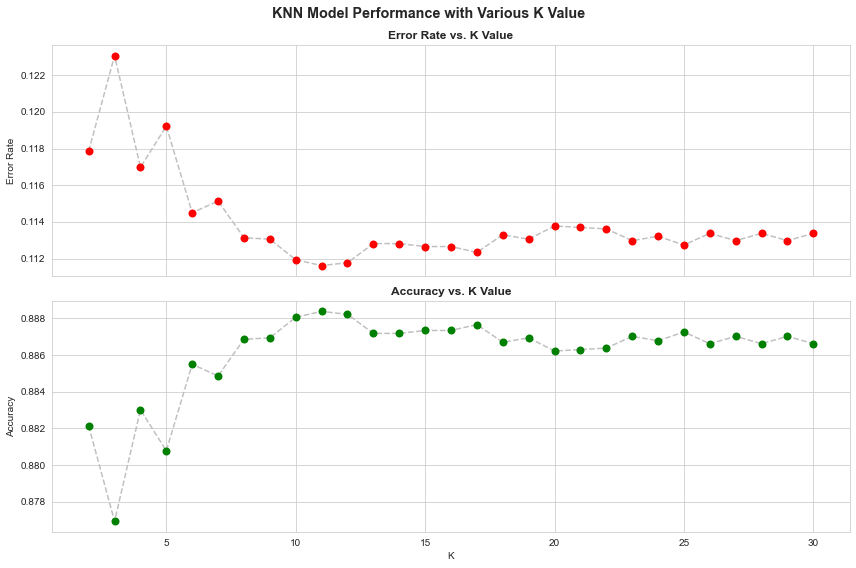

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), tight_layout=True, sharex=True)
fig.suptitle('KNN Model Performance with Various K Value', fontsize='x-large', fontweight='bold')

ax[0].plot(range(min_k, max_k+1), err, color='silver', linestyle='dashed', 
           marker='o', markerfacecolor='red', markersize=8, markeredgewidth=0)
ax[0].set_title('Error Rate vs. K Value', fontweight='bold')
ax[0].set_ylabel('Error Rate')

ax[1].plot(range(min_k, max_k+1), acc, color='silver', linestyle='dashed', 
           marker='o', markerfacecolor='green', markersize=8, markeredgewidth=0)
ax[1].set_title('Accuracy vs. K Value', fontweight='bold')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('K')

plt.show()

In [32]:
model_KNN = KNeighborsClassifier(n_neighbors=k_choice)
model_KNN.fit(x_train_scaled, y_train)
y_pred_KNN = model_KNN.predict(x_test_scaled)

print(classification_report(y_test, y_pred_KNN), end='')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11003
           1       0.64      0.15      0.24      1495

    accuracy                           0.89     12498
   macro avg       0.77      0.57      0.59     12498
weighted avg       0.87      0.89      0.86     12498


In [33]:
result_knn = round(max(acc) * 100, 3)

print('Training accuracy: ' + str(round(model_KNN.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_knn) + '%')

Training accuracy: 89.407%
Test accuracy:     88.838%


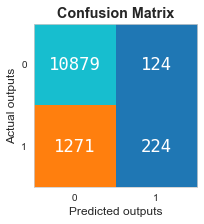

In [34]:
cmplot(confusion_matrix(y_test, y_pred_KNN))

## Support Vector Mechine (SVM)

In [35]:
tic = default_timer()
print('\r', 'Processing...', end='')

model_SVM = SVC(kernel='linear', C=0.1)
model_SVM.fit(x_train_scaled, y_train)
y_pred_SVM = model_SVM.predict(x_test_scaled)

toc = default_timer()
print('\rElapsed time: ' + str(round(toc-tic)) + ' sec.', end='\n\n')

print(classification_report(y_test, y_pred_SVM), end='')

Elapsed time: 22 sec.

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11003
           1       0.00      0.00      0.00      1495

    accuracy                           0.88     12498
   macro avg       0.44      0.50      0.47     12498
weighted avg       0.78      0.88      0.82     12498


C:\Users\Nurianti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nurianti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nurianti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
result_svm = round(model_SVM.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_SVM.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_svm) + '%')

Training accuracy: 88.269%
Test accuracy:     88.038%


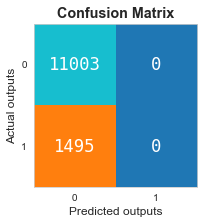

In [37]:
cmplot(confusion_matrix(y_test, y_pred_SVM))

## Decision Tree

In [38]:
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_DT.fit(x_train_scaled, y_train)
y_pred_DT = model_DT.predict(x_test_scaled)

print(classification_report(y_test, y_pred_DT), end='')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11003
           1       0.70      0.16      0.26      1495

    accuracy                           0.89     12498
   macro avg       0.80      0.58      0.60     12498
weighted avg       0.87      0.89      0.86     12498


In [39]:
result_dt = round(model_DT.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_DT.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_dt) + '%')

Training accuracy: 89.301%
Test accuracy:     89.166%


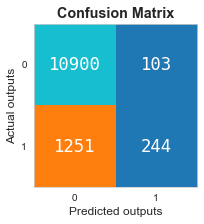

In [41]:
cmplot(confusion_matrix(y_test, y_pred_DT))

## Random Forest

In [42]:
model_RF = RandomForestClassifier(random_state=11)
model_RF.fit(x_train_scaled, y_train)
y_pred_RF = model_RF.predict(x_test_scaled)

print(classification_report(y_test, y_pred_RF), end='')

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11003
           1       0.64      0.21      0.32      1495

    accuracy                           0.89     12498
   macro avg       0.77      0.60      0.63     12498
weighted avg       0.87      0.89      0.87     12498


In [43]:
result_rf = round(model_RF.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_RF.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_rf) + '%')

Training accuracy: 99.993%
Test accuracy:     89.158%


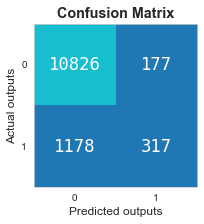

In [44]:
cmplot(confusion_matrix(y_test, y_pred_RF))

## Naive Bayes

In [45]:
model_GNB = GaussianNB()
model_GNB.fit(x_train_scaled, y_train)
y_pred_GNB = model_GNB.predict(x_test_scaled)

print(classification_report(y_test, y_pred_GNB), end='')

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11003
           1       0.27      0.32      0.29      1495

    accuracy                           0.82     12498
   macro avg       0.59      0.60      0.59     12498
weighted avg       0.83      0.82      0.82     12498


In [46]:
result_gnb = round(model_GNB.score(x_test_scaled, y_test) * 100, 3)

print('Training accuracy: ' + str(round(model_GNB.score(x_train_scaled, y_train) * 100, 3)) + '%')
print('Test accuracy:     ' + str(result_gnb) + '%')

Training accuracy: 81.582%
Test accuracy:     81.757%


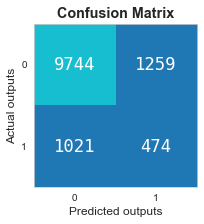

In [47]:
cmplot(confusion_matrix(y_test, y_pred_GNB))

## Overall Analysis

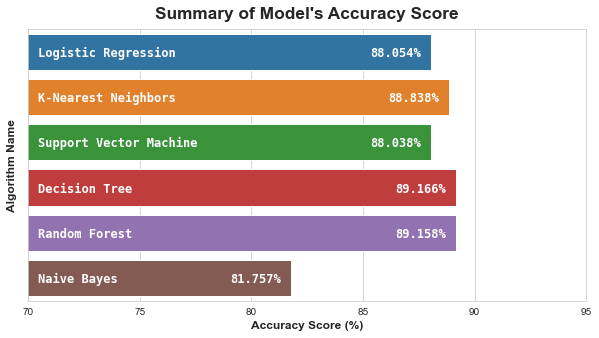

In [49]:
res = pd.DataFrame({
    'Algorithm': [
        'Logistic Regression', 
        'K-Nearest Neighbors', 
        'Support Vector Machine', 
        'Decision Tree', 
        'Random Forest', 
        'Naive Bayes'
    ], 
    'Accuracy': [result_lr, result_knn, result_svm, result_dt, result_rf, result_gnb]
})

fig = plt.figure(figsize=(10, 5))

ax = sns.barplot(data=res, x='Accuracy', y='Algorithm')
ax.set(xlim=(70, 95))

for i, p in enumerate(ax.patches):
    ax.annotate(str(p.get_width()) + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2), 
                textcoords="offset points", xytext=(-10,-5), ha='right', 
                color='white', fontsize='large', fontweight='bold', family='monospace')
    ax.annotate(res['Algorithm'][i], xy=(70, p.get_y()+p.get_height()/2), 
                textcoords="offset points", xytext=(10,-5), ha='left', 
                color='white', fontsize='large', fontweight='bold', family='monospace')

plt.title('Summary of Model\'s Accuracy Score', fontsize='xx-large', fontweight='bold', pad=10)
ax.set_yticklabels(labels='')
ax.set_xlabel('Accuracy Score (%)', fontsize='large', fontweight='bold')
ax.set_ylabel('Algorithm Name', fontsize='large', fontweight='bold')

plt.show()

Dari berbagai model algoritma yang telah dijalankan. Ternyata dengan menggunakan algoritma Decision Tree menghasilkan akurasi yang lebih tinggi dibandingkan dengan algoritma lainnya, yaitu 89.166%. Akurasi dapat dikatakan sebagai tingkat kedekatan nilai prediksi yang sebenarnya. angka tersebut dapat ditingkatkan jika kita mengoptimalkan parameter model. Untuk KNN, juga telah melakukan proses pemilihan nilai K terbaik, yang memutuskan bahwa K=11 adalah nilai terbaik.